# Importing Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

## Loading MNIST Dataset from keras

In [4]:
dataset = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 14s 1us/step


## Exploring The Dataset

In [8]:
(x_train,y_train),(x_test,y_test)=dataset

In [9]:
x_train.shape

(60000, 28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

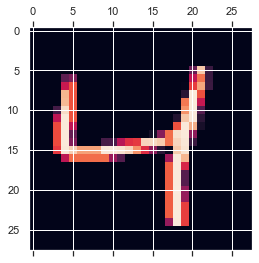

In [27]:
plt.matshow(x_train[2])

In [26]:
y_train[2]

4

### Scale the inputs

In [42]:
x_train = x_train/255
x_test = x_test/255

In [43]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Lets' flattened the inputs.( 2 dimention -> 1 dimention)

In [44]:
x_train.shape

(60000, 28, 28)

In [45]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [46]:
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

## Let's create a Neural Network

In [47]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4752 - accuracy: 0.8749
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3047 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2735 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2670 - accuracy: 0.9256


In [48]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 4s 1ms/step - loss: 0.2681 - accuracy: 0.9248


[0.26814231276512146, 0.9247999787330627]

# 92% accuracy

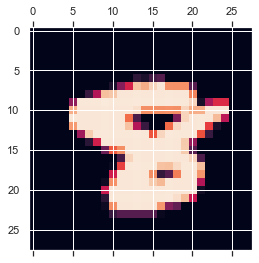

In [63]:
plt.matshow(x_test[998])

In [64]:
y_prediction = model.predict(x_test_flattened)

In [67]:
y_test[998]

8

In [65]:
y_prediction[998]

array([2.17765570e-04, 3.28193717e-09, 1.57922506e-04, 8.18024910e-06,
       1.48281455e-02, 2.24798322e-02, 2.45214105e-02, 6.04760647e-03,
       8.48421037e-01, 2.52612501e-01], dtype=float32)

In [66]:
np.argmax(y_prediction[998]) #argmax finds the maximum and returns the index value

8

#### tf.math.confusion_matrix(labels=y_test, predictions = y_prediction) # y_test are int values but y_predictions are float

In [68]:
y_predictions_labels = [np.argmax(i) for i in y_prediction]
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_predictions_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    5,    9,    2,    2,    0],
       [   0, 1113,    2,    2,    0,    1,    4,    2,   11,    0],
       [   5,    9,  923,   15,    8,    2,   13,   12,   43,    2],
       [   3,    1,   24,  909,    0,   26,    4,   14,   23,    6],
       [   1,    1,    4,    1,  907,    0,   15,    5,   11,   37],
       [   9,    3,    3,   31,   10,  760,   20,   10,   38,    8],
       [   8,    3,    5,    1,    7,    7,  924,    2,    1,    0],
       [   1,    5,   23,    2,    3,    0,    0,  972,    4,   18],
       [   5,    8,    7,   16,    8,   17,   11,   13,  883,    6],
       [  11,    7,    1,   10,   26,    4,    0,   45,    6,  899]])>

Text(66.5, 0.5, 'Actual Values')

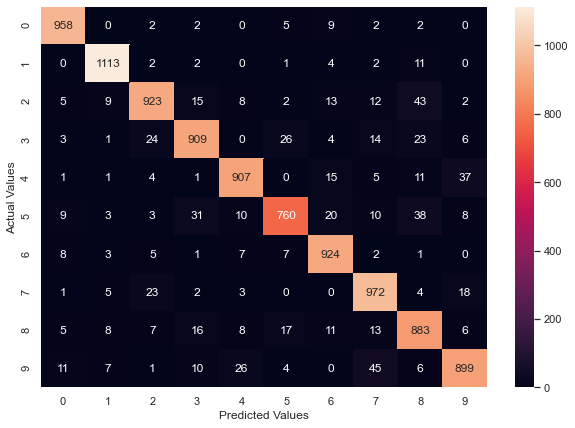

In [75]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

## Let's add a hidden layer to improve performance

In [76]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2708 - accuracy: 0.9225
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1186 - accuracy: 0.9653
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0835 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0645 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0510 - accuracy: 0.9844


In [77]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0759 - accuracy: 0.9770


[0.0758744403719902, 0.9769999980926514]

# 98% accuracy

The below code segment is nothing but the same code with keras flatten api. So we dont need to flatten the inputs separately

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train, epochs=5,verbose=1)

In [80]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 2ms/step - loss: 0.0831 - accuracy: 0.9757


[0.08308766037225723, 0.9757000207901001]

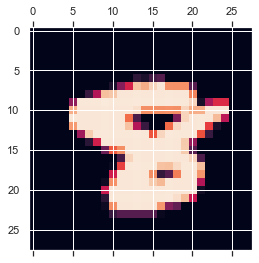

In [81]:
plt.matshow(x_test[998])

In [84]:
y_predict = model.predict(x_test)
np.argmax(y_predict[998])

8

Text(66.5, 0.5, 'Actual Values')

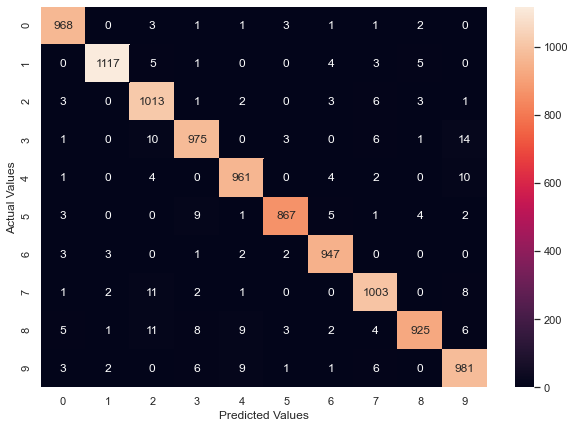

In [89]:
y_predict_for_cm = [np.argmax(i) for i in y_predict]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_for_cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')